<a href="https://colab.research.google.com/github/SaymaSJ/Porject-IoMT-/blob/main/IoMT(SVM%2CKNN%2CLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Dataset**

In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,precision_recall_curve,recall_score

In [ ]:
import os
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df= pd.read_csv("/content/Health(IoMT).csv")
df.head()

,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Dry Cough,Muscle Pain,Headache,Runny Nose,Outcome
0,98.8,96,96,0,1,0,1,0
1,100.5,97,93,1,0,0,0,1
2,100.6,96,94,1,1,0,0,1
3,99.3,95,95,1,1,1,1,0
4,100.2,97,93,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature ()         1000 non-null   float64
 1   Heart Rate (BPM)       1000 non-null   int64  
 2   Oxygen Saturation (%)  1000 non-null   int64  
 3   Dry Cough              1000 non-null   int64  
 4   Muscle Pain            1000 non-null   int64  
 5   Headache               1000 non-null   int64  
 6   Runny Nose             1000 non-null   int64  
 7   Outcome                1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [ ]:
df.dtypes

Temperature ()           float64
Heart Rate (BPM)           int64
Oxygen Saturation (%)      int64
Dry Cough                  int64
Muscle Pain                int64
Headache                   int64
Runny Nose                 int64
Outcome                    int64
dtype: object

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()

In [ ]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("Outcome")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (),1000.0,100.638,1.507185,98.0,99.2,100.5,101.9,103.9
Heart Rate (BPM),1000.0,99.325,5.084804,4.0,96.0,99.0,101.0,116.0
Oxygen Saturation (%),1000.0,94.089,2.832155,88.0,92.0,95.0,96.0,99.0
Dry Cough,1000.0,0.492,0.500186,0.0,0.0,0.0,1.0,1.0
Muscle Pain,1000.0,0.497,0.500241,0.0,0.0,0.0,1.0,1.0
Headache,1000.0,0.532,0.499225,0.0,0.0,1.0,1.0,1.0
Runny Nose,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
Outcome,1000.0,0.657,0.474949,0.0,0.0,1.0,1.0,1.0


In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Viral fever Prediction")

[]

<Figure size 1000x800 with 0 Axes>

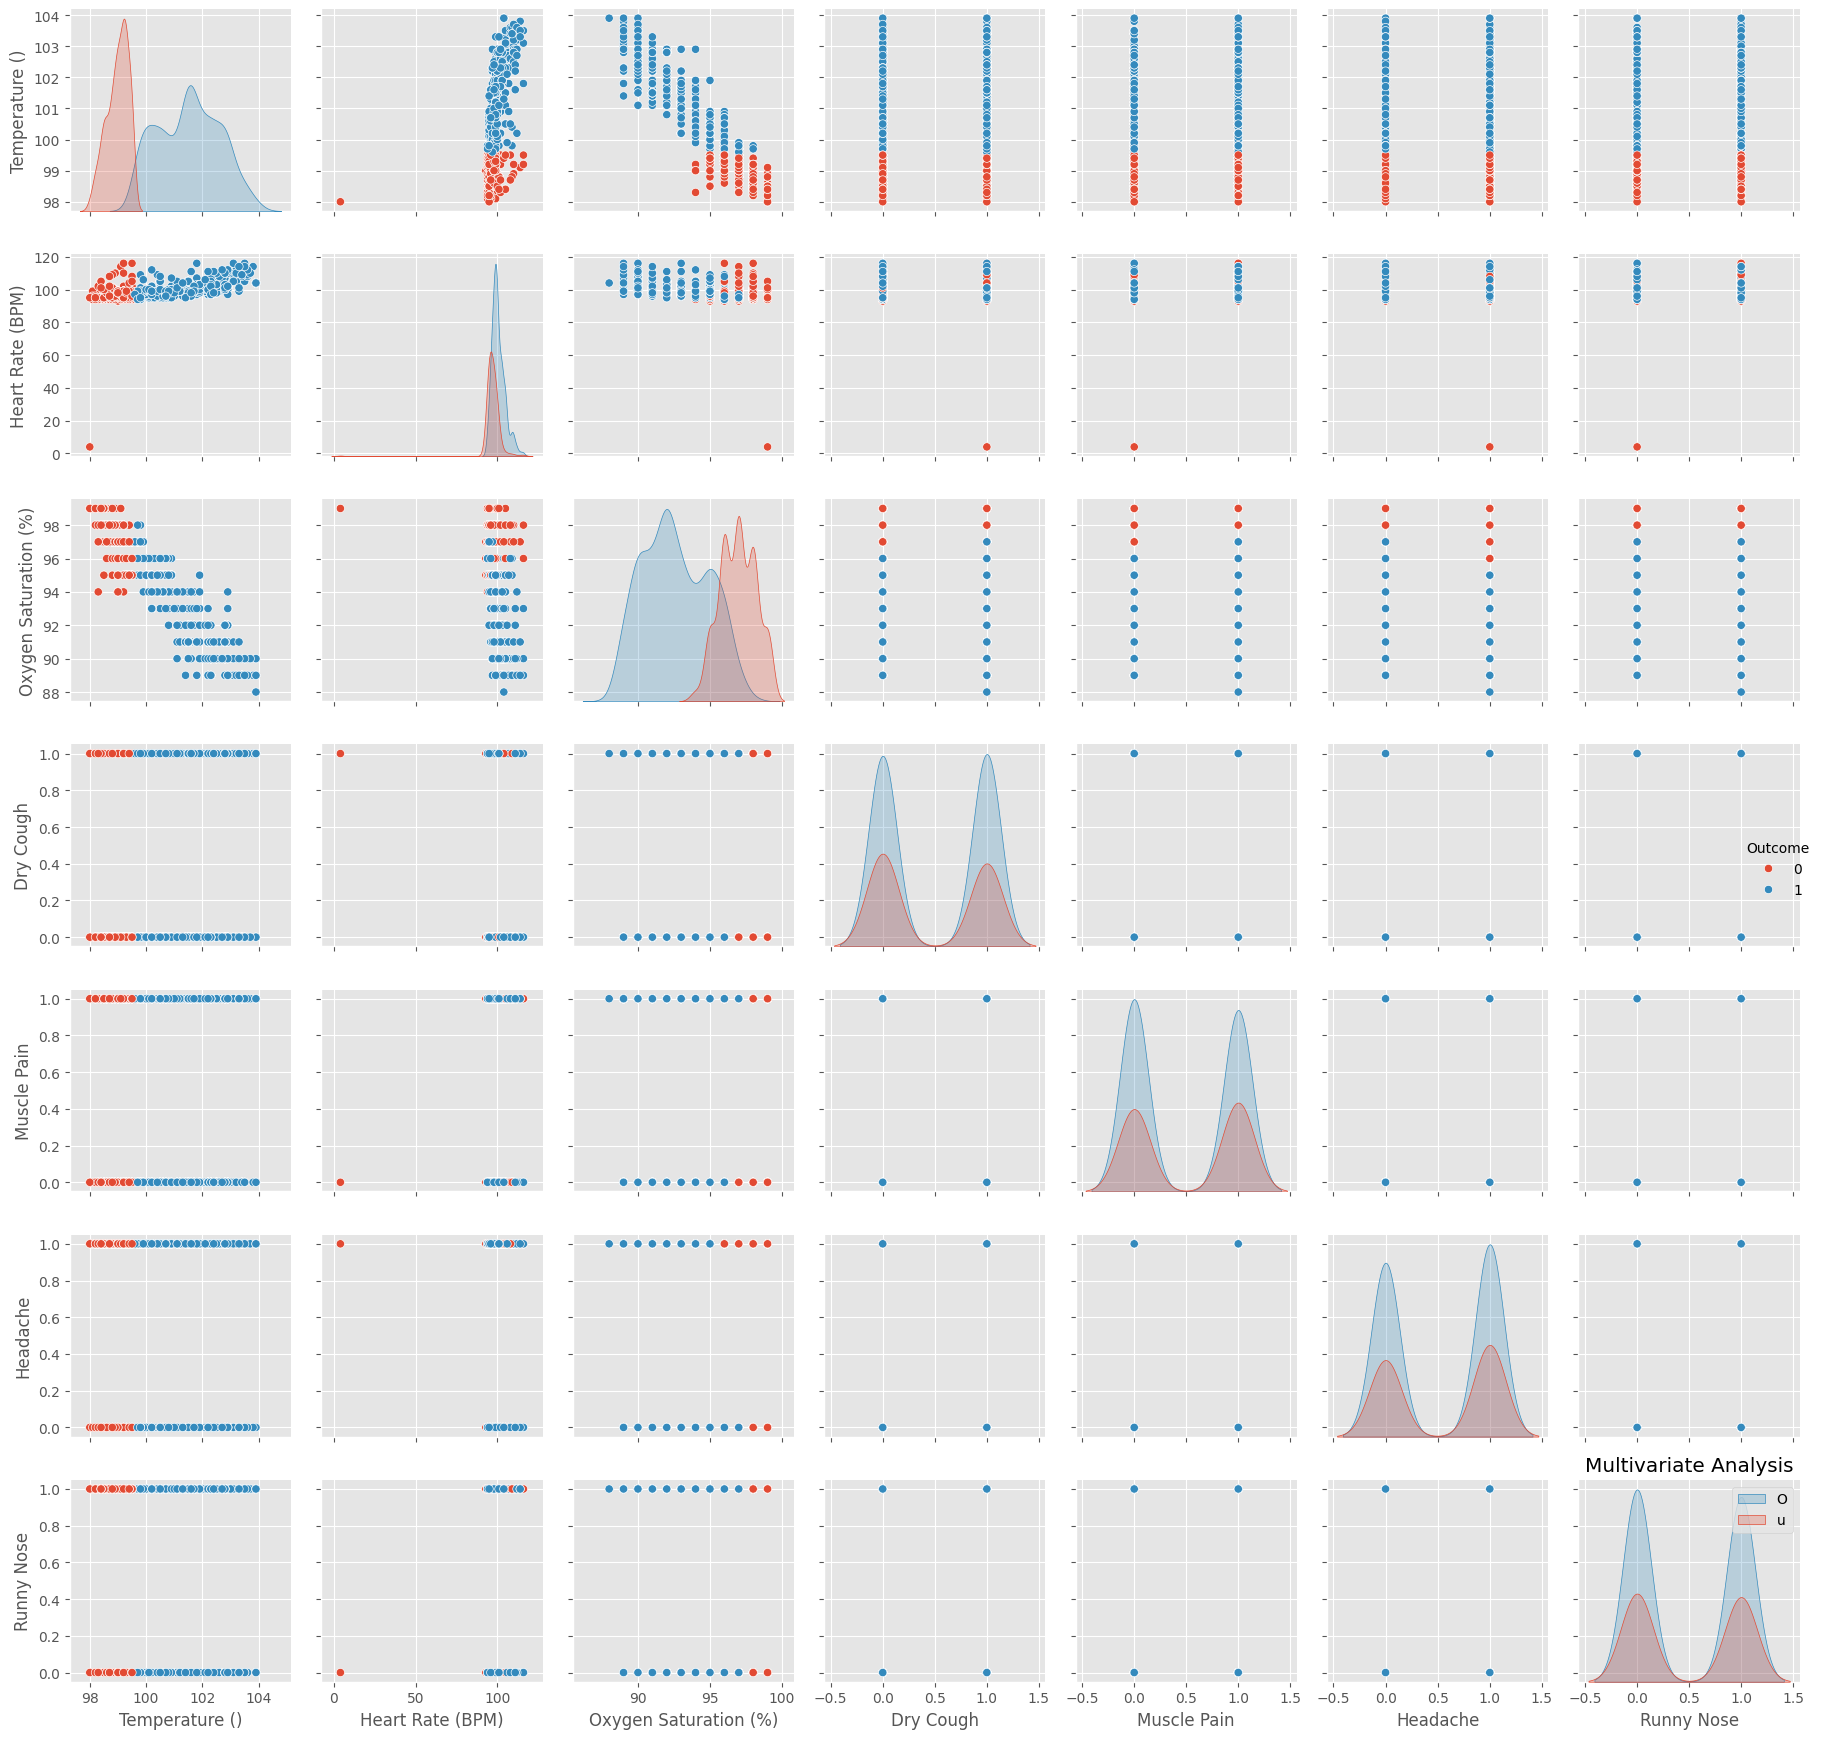

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue="Outcome")
plt.title("Multivariate Analysis")
plt.legend("Outcome")
plt.tight_layout()
plt.plot()

**Handling missing values**


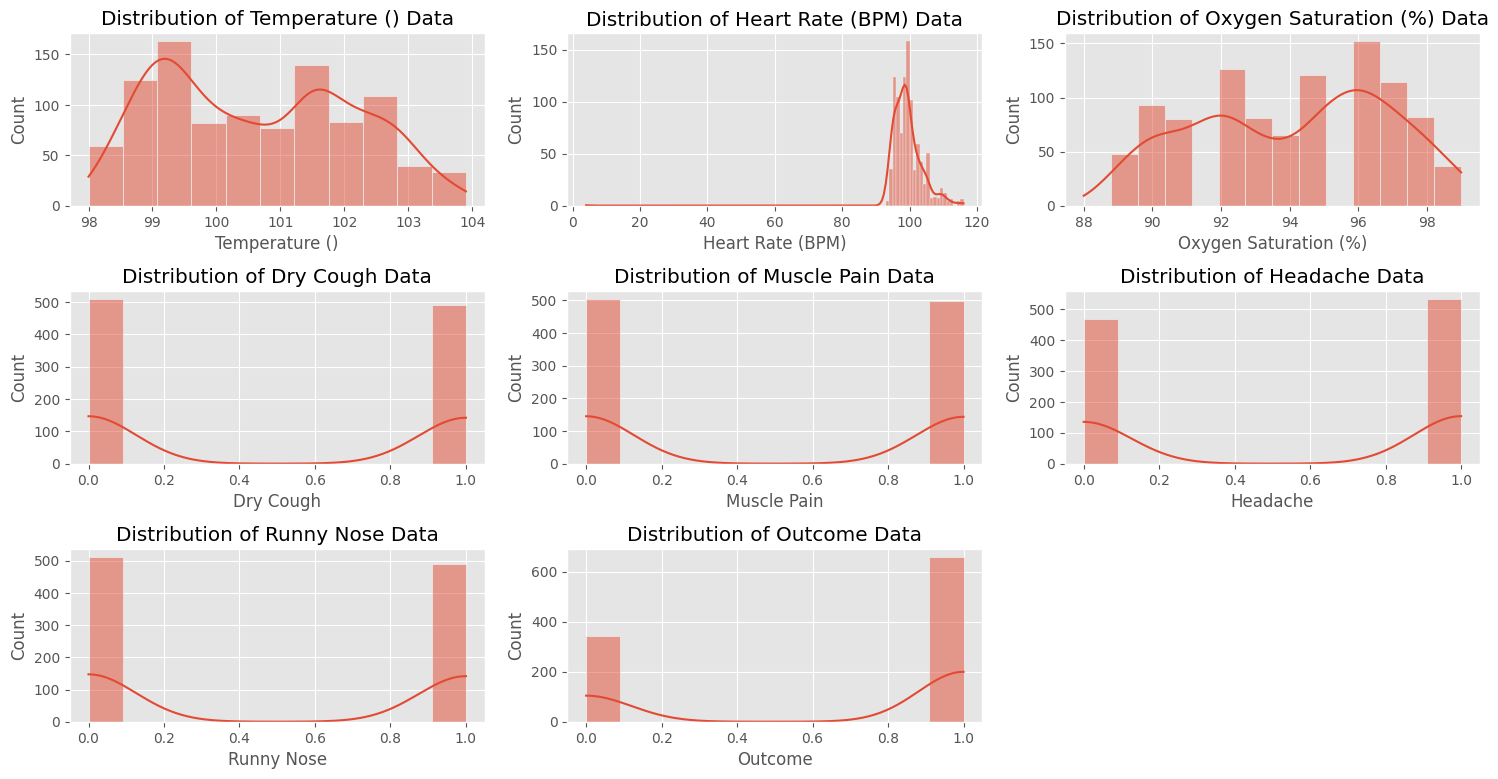

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [ ]:
import missingno as msno

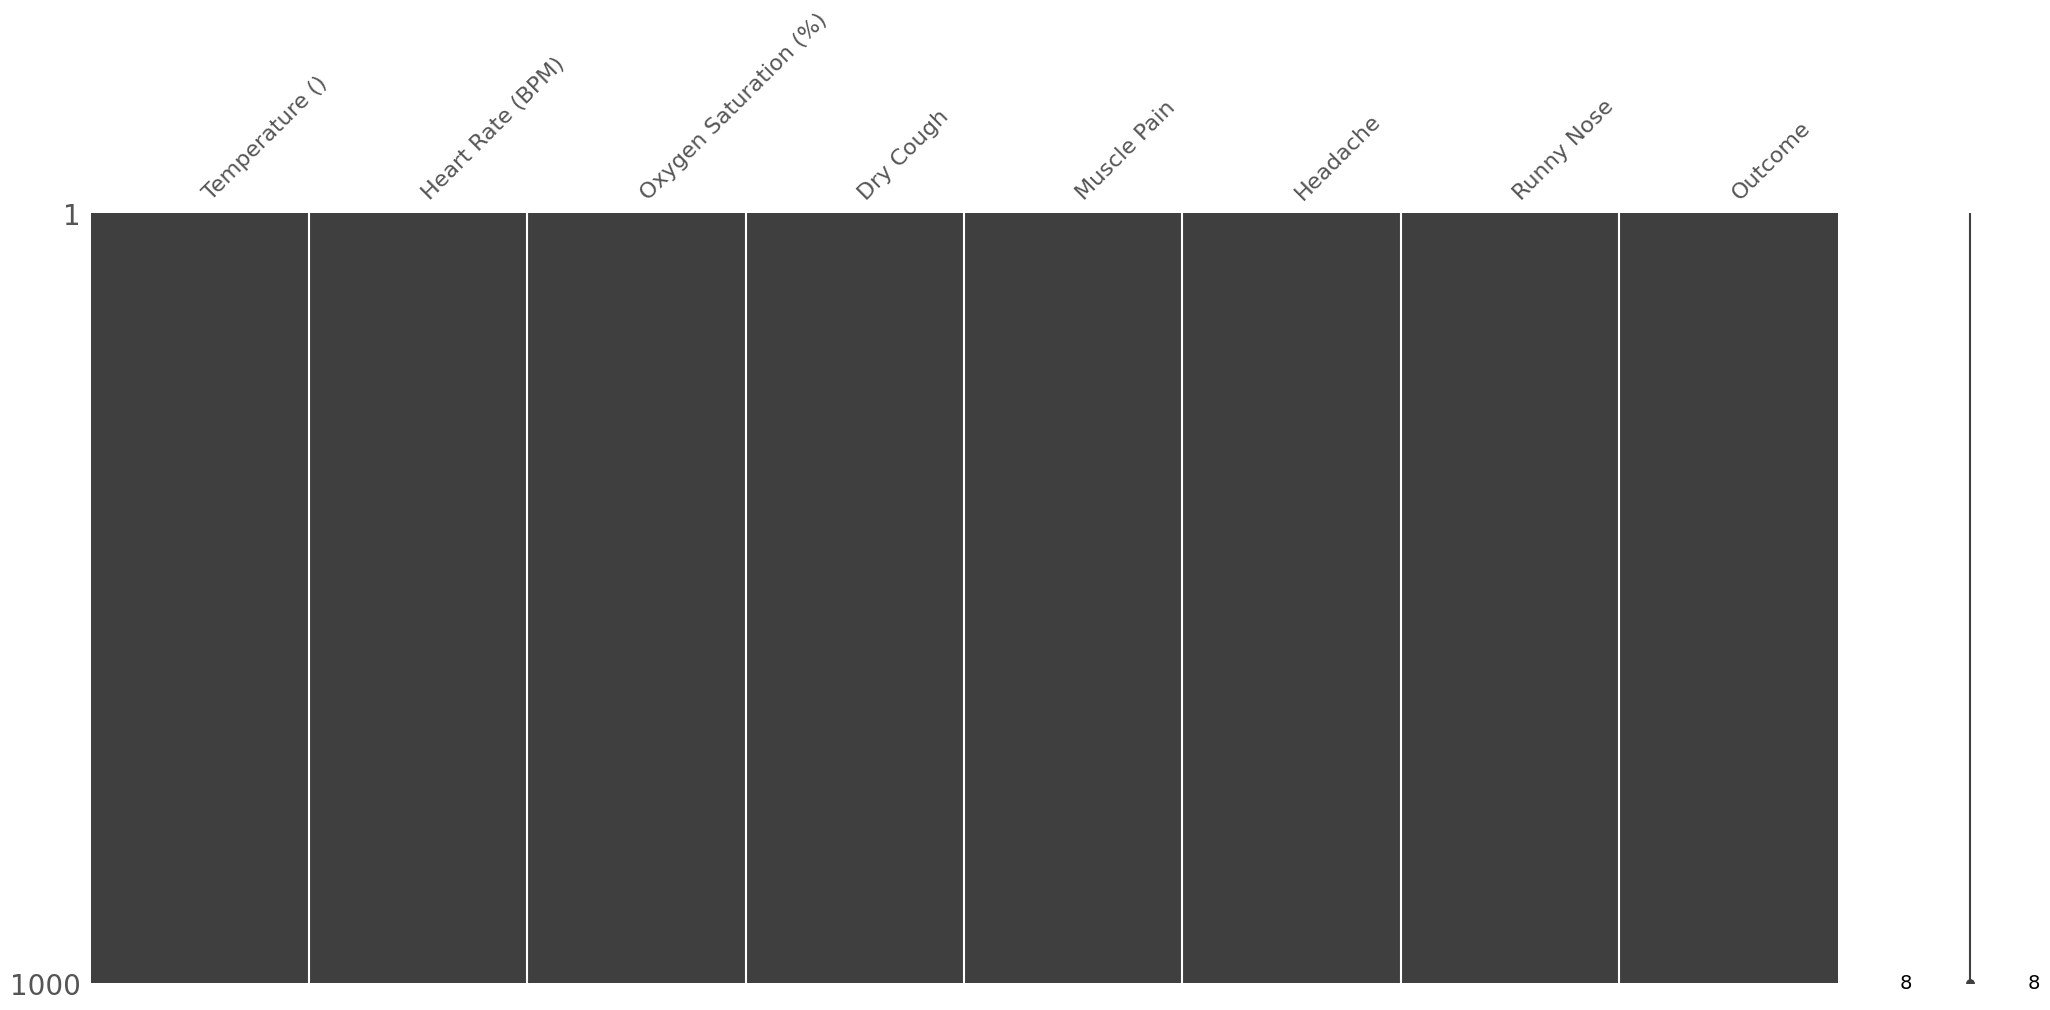

<Figure size 1500x900 with 0 Axes>

In [ ]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()


In [ ]:
df.isnull().sum()

Temperature ()           0
Heart Rate (BPM)         0
Oxygen Saturation (%)    0
Dry Cough                0
Muscle Pain              0
Headache                 0
Runny Nose               0
Outcome                  0
dtype: int64

In [ ]:
fig = px.box(df,y='Temperature ()',x='Outcome',title=f"Distrubution of Temperature")
fig.show()

In [ ]:
fig = px.box(df,y='Heart Rate (BPM)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [ ]:
fig = px.box(df,y='Oxygen Saturation (%)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sb


# Imbalance data(SMOTE)

In [ ]:

!pip install py-AutoClean

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.1 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10273 sha256=8c4f66c6e0098b9c91bdd9cf47d557123d10c31c3466c10e907b844bacf3c907
  Stored in directory: /root/.cache/pip/wheels/b5/13/2b/3a5fdae6161f870ea670f2bf3a7157f8a5b38b166282b6bc92
Successfully built py-AutoClean


In [ ]:
from AutoClean import AutoClean

In [ ]:
df.shape

(1000, 8)

In [ ]:
from collections import Counter
!pip install imblearn

In [ ]:
print(sorted(Counter(df['Outcome']).items()))

[(0, 343), (1, 657)]


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#creation of instance
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [ ]:
X = scaled_features
y = df['Outcome']

In [ ]:
print(f'X:{X.shape}')
print(f'y:{y.shape}')

X:(1000, 7)
y:(1000,)


Counter({1: 657, 0: 343})


<Axes: ylabel='count'>

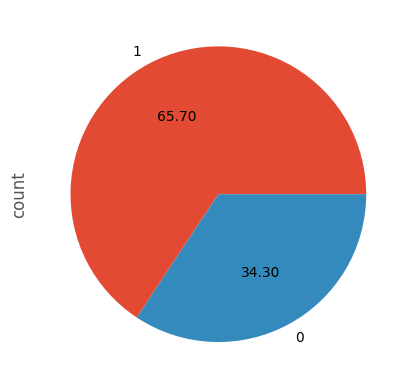

In [ ]:
y.value_counts()
counter = Counter(y)
print(counter)
y.value_counts().plot.pie(autopct='%.2f')

[(0, 657), (1, 657)] (1314,)


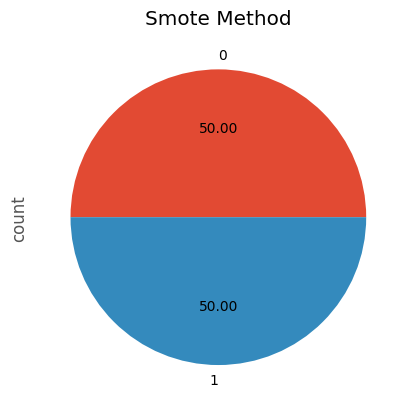

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_res, y_res = sm.fit_resample(X,y)
ax= y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Smote Method")
print(sorted(Counter(y_res).items()),y_res.shape)

In [ ]:
#  y_res.value_counts().plot(kind = 'bar', color = ['blue', 'red'])

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Outcome 0 (Synthetic)', alpha=0.5)
# plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Outcome 1 (Synthetic)', alpha=0.5)
# plt.xlabel('Standardized Feature 1')
# plt.ylabel('Standardized Feature 2')
# plt.title('Scatter Plot after SMOTE (with Standardization)')
# plt.legend()
# plt.show()
# from matplotlib import pyplot
# from numpy import where
# for label, _ in counter.items():
# row_ix = where(y == label)[0]
# plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# plt.legend()
# plot_params.show()

In [ ]:
print(f"X_res shape: {X_res.shape}")
print(f"y_res shape: {y_res.shape}")

X_res shape: (1314, 7)
y_res shape: (1314,)


# Train-test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, stratify=y_res, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1000, 7) (985, 7) (329, 7)


In [ ]:
import numpy as np

from collections import Counter



# Calculate class distribution
class_distribution = Counter(y_res)

# Calculate class imbalance
total_samples = len(y_res)
class_imbalance = {class_label: count / total_samples for class_label, count in class_distribution.items()}

print("Class Distribution:")
print(class_distribution)
print("\nClass Imbalance:")
print(class_imbalance)

Class Distribution:
Counter({0: 657, 1: 657})

Class Imbalance:
{0: 0.5, 1: 0.5}


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample

# # Upsample the minority class to match the majority class
# X_resampled, y_resampled = resample(X[y==1], y[y==1], replace=True, n_samples=X[y==0].shape[0], random_state=42)

# # Concatenate the upsampled minority class with the majority class
# X_balanced = np.vstack((X[y==0], X_resampled))
# y_balanced = np.hstack((y[y==0], y_resampled))

# # Split the balanced dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.25, stratify=y_balanced, random_state=42)

# print(X.shape, X_train.shape, X_test.shape)


In [ ]:
import numpy as np

from collections import Counter



# Calculate class distribution
class_distribution = Counter(y_res)

# Calculate class imbalance
total_samples = len(y_res)
class_imbalance = {class_label: count / total_samples for class_label, count in class_distribution.items()}

print("Class Distribution:")
print(class_distribution)
print("\nClass Imbalance:")
print(class_imbalance)

Class Distribution:
Counter({0: 657, 1: 657})

Class Imbalance:
{0: 0.5, 1: 0.5}


Testing

# Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()


# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_train, y_train)

# print(clf.best_params_)

# print(clf.best_score_)


# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
#     'logisticregression__penalty': ['l1', 'l2']
# }
  }
# # Create GridSearchCV object
# lr = GridSearchCV(pipe, param_grid, cv=5,return_train_score=False,scoring='f1_micro' )
lr = GridSearchCV(pipe, param_grid, cv=5,return_train_score=False,scoring='accuracy' )

# Fit the model
# grid_search.fit(X, y)
lr.fit(X_train, y_train)
#  return_train_score=False,scoring='f1_macro')

# Print best parameters and best score
print("Best Parameters:", lr.best_params_)
print("Best Score:", lr.best_score_)


lr.cv_results_
# Predictions on the test set
y_pred = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", f1)

Best Parameters: {'logisticregression__C': 100}
Best Score: 0.9532994923857867
Accuracy: 0.9209726443768997
Precision: 0.9209726443768997
Recall: 0.9209726443768997
F1 Score: 0.9209726443768997


In [ ]:
data = pd.DataFrame(lr.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003088,0.000394,0.001123,0.000163,0.1,{'logisticregression__C': 0.1},0.944162,0.954315,0.949239,0.939086,0.939086,0.945178,0.005920,4
1,0.002824,0.000335,0.000951,0.000026,1,{'logisticregression__C': 1},0.944162,0.959391,0.949239,0.959391,0.949239,0.952284,0.006091,2
2,0.002901,0.000426,0.000971,0.000039,10,{'logisticregression__C': 10},0.944162,0.959391,0.949239,0.959391,0.949239,0.952284,0.006091,2
3,0.002687,0.000038,0.000957,0.000015,100,{'logisticregression__C': 100},0.944162,0.959391,0.949239,0.964467,0.949239,0.953299,0.007460,1


In [ ]:
# Assign algorithm
lr=LogisticRegression(max_iter=1000, solver='saga', tol=0.1,C=100)





# Link algorithm to X and y variables
lr.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y_pred = lr.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
lr.score=(X_test,y_test)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[165   0]
 [ 28 136]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       165
           1       1.00      0.83      0.91       164

    accuracy                           0.91       329
   macro avg       0.93      0.91      0.91       329
weighted avg       0.93      0.91      0.91       329

Accuracy: 0.9148936170212766
Precision: 1.0
Recall: 0.8292682926829268
F1-Score: 0.9066666666666667


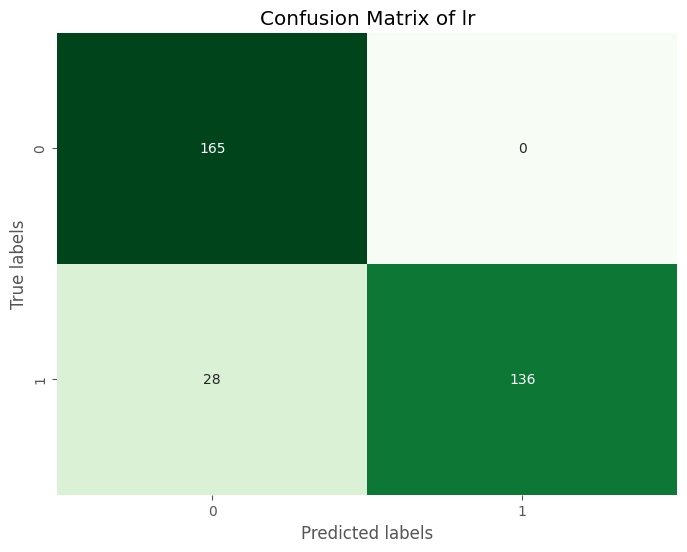

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()

Confusion Matrix:
[[165   0]
 [ 28 136]]
Accuracy: 0.9148936170212766
Precision: 0.9272406570389152
Recall: 0.9148936170212766
F1 Score: 0.9142501683901898
Specificity: 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.17073170731707318
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.8549222797927462
Matthews Correlation Coefficient (MCC): 0.8419975886784511
Informedness (Youden's J statistic): 0.9148936170212765
Markedness: 0.854922279792746


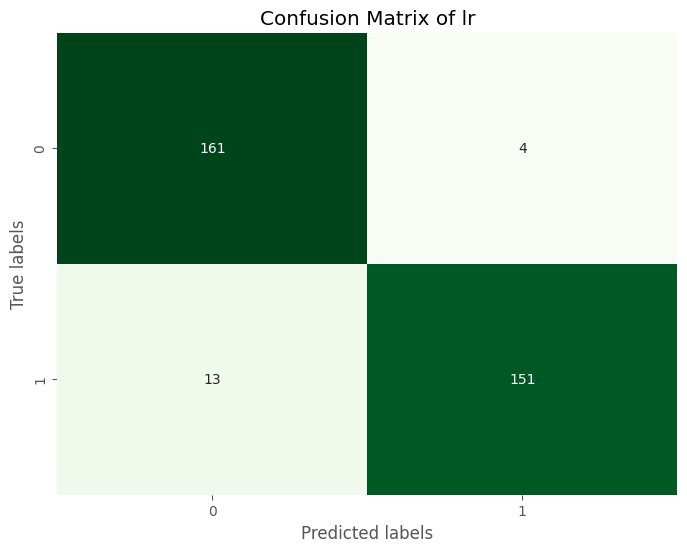

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()



# incase

Confusion Matrix:
[[161   4]
 [ 15 149]]
Accuracy: 0.9422492401215805
Accuracy: 0.9422492401215805
Precision: 0.9442246756858771
Recall: 0.9422492401215805
F1 Score: 0.9421787191977439
Specificity: 0.9757575757575757
False Positive Rate (FPR): 0.024242424242424242
False Negative Rate (FNR): 0.09146341463414634
Positive Predictive Value (PPV): 0.9738562091503268
Negative Predictive Value (NPV): 0.9147727272727273
Matthews Correlation Coefficient (MCC): 0.8864588991511281
Informedness (Youden's J statistic): 0.9180068158791563
Markedness: 0.888628936423054


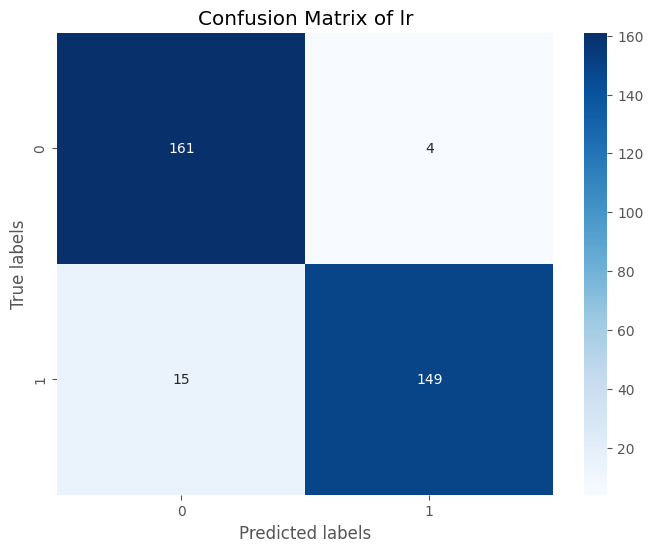

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a trained logistic regression model named 'lr'
# and your test features are in 'X_test'

# Get predicted probabilities for each class
y_proba = lr.predict_proba(X_test)

# Extract the probabilities for the positive class (assuming it's class 1)
y_proba_positive = y_proba[:, 1]

# Assuming you have true labels y_true

# Define a threshold
threshold = 0.3
# Example threshold, you can adjust as needed

# Convert predicted probabilities to binary predictions based on the threshold
y_pred_threshold = (y_proba_positive >= threshold).astype(int)

# Now you can compute the confusion matrix, accuracy, or other metrics using y_true and y_pred_threshold

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix:")
print(cm)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_threshold)
print("Accuracy:", accuracy)

# Calculate the validation metrics
precision = precision_score(y_test, y_pred_threshold, average='weighted')
recall = recall_score(y_test, y_pred_threshold, average='weighted')
f1 = f1_score(y_test, y_pred_threshold, average='weighted')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))**0.5
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of lr')
plt.show()



# **Cross validation of LR**

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000, solver='saga', tol=0.1,C=10), X, y, cv=10)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.93 0.95 0.95 0.92 0.94 0.88 0.98 0.99 0.92 0.95]
94.1


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score



# # Define the model
# model = LogisticRegression()

# # Define the parameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'solver': ['liblinear', 'saga'],       # Solver for optimization problem
#     'penalty': ['l1', 'l2'],               # Penalty (L1 or L2 regularization)
# }

# # Define scoring metrics
# scoring = {
#     'f1_score': make_scorer(f1_score),
#     'accuracy': make_scorer(accuracy_score),
#     'recall': make_scorer(recall_score)
# }

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='f1_score')
# grid_search.fit(X_res, y_res)

# # Get the best parameters and scores
# print("Best parameters found:", grid_search.best_params_)
# print("Best F1 score:", grid_search.best_score_)
# print("Best accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
# print("Best recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# from sklearn.model_selection import GridSearchCV

# svm = GridSearchCV(SVC(gamma='auto'), {'kernel': ['linear','rbf'], 'C': [0.1, 10, ],
#                                        }, cv=5, return_train_score=False,scoring='f1_macro')
# svm.fit(X_train, y_train)
# svm.cv_results_

# # Print best parameters and best score
# print("Best Parameters:", svm.best_params_)
# print("Best Score:", svm.best_score_)


# svm.cv_results_
# # Predictions on the test set
# y_pred = svm.predict(X_test)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Precision
# precision = precision_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
# print("Precision:", precision)

# # Recall
# recall = recall_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
# print("Recall:", recall)

# # F1 Score
# f1 = f1_score(y_test, y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", f1)

F1 Score: 0.9482651698085076


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a pipeline with scaler and Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(max_iter=1000, tol=0.1))

# Create a parameter grid
svm_param_grid = {
    'svc__C': [0.001,
0.01, 0.05,
0.1,

],
    'svc__kernel': ['linear']
}

# Create GridSearchCV object
svm = GridSearchCV(svm, svm_param_grid, cv=10
                   , return_train_score=False, scoring='precision')

# Fit the model
svm.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", svm.best_params_)
print("Best Score:", svm.best_score_)

# Predictions on the test set
svm_y_pred = svm.predict(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

# Precision
svm_precision = precision_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Precision:", svm_precision)

# Recall
svm_recall = recall_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Recall:", svm_recall)

# F1 Score
svm_f1 = f1_score(y_test, svm_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", svm_f1)


Best Parameters: {'svc__C': 0.001, 'svc__kernel': 'linear'}
Best Score: 1.0
Accuracy: 0.8693009118541033
Precision: 0.8693009118541033
Recall: 0.8693009118541033
F1 Score: 0.8693009118541033


In [ ]:
data = pd.DataFrame(svm.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037394,0.007081,0.005551,0.002082,0.001,linear,"{'svc__C': 0.001, 'svc__kernel': 'linear'}",0.818182,0.858586,0.888889,0.878788,0.828283,0.897959,0.816327,0.857143,0.867347,0.857143,0.856865,0.026953,4
1,0.009724,0.000597,0.001999,0.000266,0.01,linear,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.878788,0.949495,0.959596,0.919192,0.929293,0.938776,0.908163,0.908163,0.948980,0.928571,0.926902,0.023006,3
2,0.006696,0.000288,0.001405,0.000085,0.05,linear,"{'svc__C': 0.05, 'svc__kernel': 'linear'}",0.939394,0.989899,0.979798,0.969697,0.949495,0.948980,0.948980,0.938776,0.969388,0.938776,0.957318,0.017536,2
3,0.006124,0.000266,0.001323,0.000041,0.1,linear,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.939394,0.989899,0.979798,0.969697,0.949495,0.959184,0.959184,0.948980,0.979592,0.938776,0.961400,0.016889,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assign algorithm
svm = SVC(max_iter=1000, tol=0.1, C=0.001, kernel='linear', probability=True)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Link algorithm to scaled X and y variables, then train the model
svm.fit(X_train_scaled, y_train)

# Run algorithm on test data to make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
[[165   0]
 [ 43 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       165
           1       1.00      0.74      0.85       164

    accuracy                           0.87       329
   macro avg       0.90      0.87      0.87       329
weighted avg       0.90      0.87      0.87       329


Accuracy: 0.8693009118541033
Precision: 1.0
Recall: 0.7378048780487805
F1-Score: 0.8491228070175438


Confusion Matrix:
[[164   1]
 [ 39 125]]
Accuracy: 0.878419452887538
Precision: 0.9920634920634921
Recall: 0.7621951219512195
F1 Score: 0.8620689655172414
False Positive Rate (FPR): 0.006060606060606061


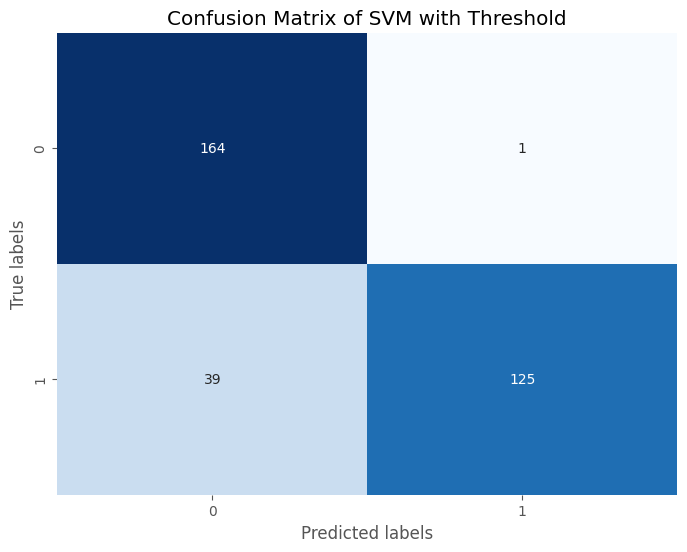

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assign algorithm
svm = SVC(max_iter=1000, tol=0.1, C=.01,kernel='rbf', probability=True)

# Train algorithm on training data
svm.fit(X_train, y_train)

# Obtain decision scores for test instances
decision_scores = svm.decision_function(X_test)

# Adjust the decision threshold (increase false positive rate)
threshold = 0.032


  # Adjust this threshold as needed
y_pred_threshold = (decision_scores >= threshold).astype(int)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold)

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
fpr = conf_mat[0, 1] / (conf_mat[0, 0] + conf_mat[0, 1])  # False positive rate

# Print metrics
print("Confusion Matrix:")
print(conf_mat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rate (FPR):", fpr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM with Threshold')
plt.show()



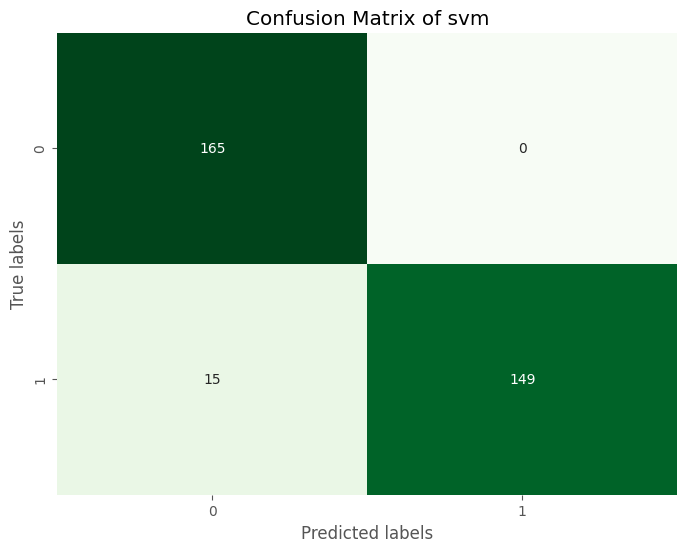

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of svm')
plt.show()

In [ ]:
cv_score_svm = cross_val_score(SVC(kernel='linear',gamma="auto", probability=True,C=.1), X, y, cv=10)

print(cv_score_svm)

mean_accuracy_svm = sum(cv_score_svm)/len(cv_score_svm)

mean_accuracy_svm = mean_accuracy_svm*100

mean_accuracy_svm = round(mean_accuracy_svm, 2)

print(mean_accuracy_svm)

[0.97 1.   1.   0.93 0.99 0.94 1.   0.97 0.95 0.94]
96.9


# test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train an SVM model
svm = SVC(C=.56, kernel='linear')  # Adjust parameters as needed
svm.fit(X_train, y_train)

# Predictions on training set
train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predictions on validation set
val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Compare training and validation accuracies
if train_accuracy > val_accuracy:
    print("Model is likely overfitting")
elif train_accuracy < val_accuracy:
    print("Model is likely underfitting")
else:
    print("Model is performing similarly on both training and validation sets")



Training Accuracy: 0.9980970504281637
Validation Accuracy: 1.0
Model is likely underfitting


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm = SVC()
# Define the hyperparameter search space
param_dist = {'C':[0.001,
0.01, 0.05,
0.1,

] }  # Search space for C, e.g., from 0.001 to 1000

# Define the random search
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Perform random search
random_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)





Best Parameters:  {'C': 0.1}
Best Score:  0.933


# Confusion matrix

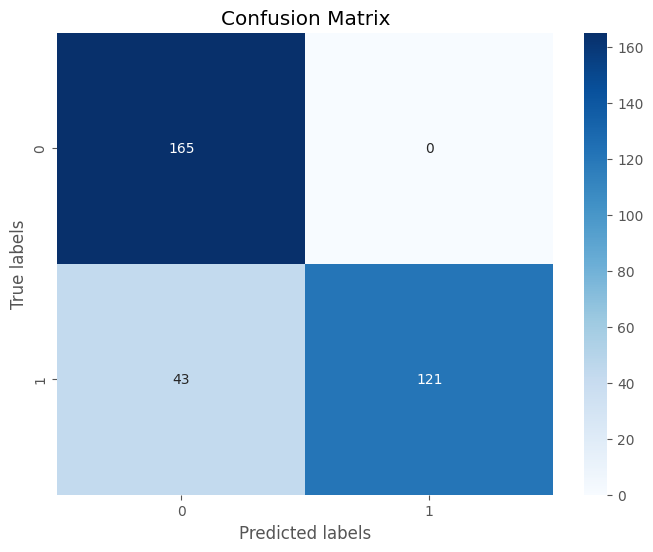

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels y_true and predicted labels y_pred
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[165   0]
 [ 35 129]]
Confusion Matrix:
[[165   0]
 [ 35 129]]
Accuracy: 0.8936170212765957
Confusion Matrix:
[[165   0]
 [ 35 129]]
Accuracy: 0.8936170212765957
Precision: 0.8936170212765957
Recall: 0.8936170212765957
F1 Score: 0.8936170212765957
Specificity: 1.0
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.21341463414634146
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.825
Matthews Correlation Coefficient (MCC): 0.8055637323199626
Informedness (Youden's J statistic): 0.8936170212765957
Markedness: 0.825


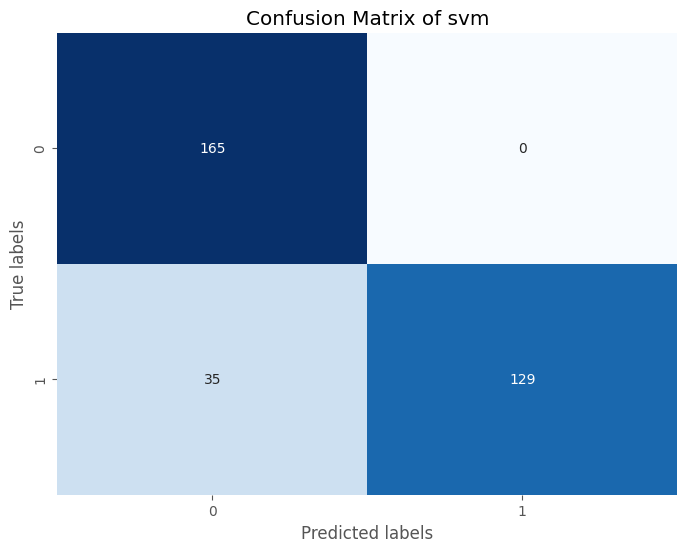

In [ ]:


## Obtain decision scores for test instances
decision_scores = svm.decision_function(X_test)

# Adjust the decision threshold (increase false positive rate)
threshold = 0.3  # Adjust this threshold as needed
y_pred_threshold1 = (decision_scores >= threshold).astype(int)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold1)
print("Confusion Matrix:")
print(conf_mat)

# Now you can compute the confusion matrix, accuracy, or other metrics using y_true and y_pred_threshold
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold1)
print("Confusion Matrix:")
print(conf_mat)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_threshold1)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred_threshold1)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred_threshold1)
precision = precision_score(y_test, y_pred_threshold1, average='micro')
recall = recall_score(y_test, y_pred_threshold1, average='micro')
f1 = f1_score(y_test, y_pred_threshold1, average='micro')

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
informedness = recall + specificity - 1
markedness = ppv + npv - 1

# Print the metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Informedness (Youden's J statistic):", informedness)
print("Markedness:", markedness)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of svm')
plt.show()


# KNN

**KNN crossvalidation**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
# Create a pipeline with scaler and Support Vector Machine
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5 ))

# Create a parameter grid
# Create a parameter grid for GridSearchCV
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5,7]}


# Create GridSearchCV object
knn = GridSearchCV(knn_pipe, knn_param_grid, cv=10
                   , return_train_score=False, scoring='f1_micro')

# Fit the model
knn.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", knn.best_params_)
print("Best Score:", knn.best_score_)

# Predictions on the test set
knn_y_pred = knn.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", knn_accuracy)

# Precision
knn_precision = precision_score(y_test, knn_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Precision:", knn_precision)

# Recall
knn_recall = recall_score(y_test, knn_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("Recall:", knn_recall)

# F1 Score
knn_f1 = f1_score(y_test, knn_y_pred, average='micro')  # Change 'micro' to 'macro' or 'weighted' as needed
print("F1 Score:", knn_f1)


Best Parameters: {'kneighborsclassifier__n_neighbors': 3}
Best Score: 0.959369202226345
Accuracy: 0.9544072948328267
Precision: 0.9544072948328267
Recall: 0.9544072948328267
F1 Score: 0.9544072948328267


In [ ]:
data = pd.DataFrame(knn.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006644,0.004000,0.031048,0.012686,3,{'kneighborsclassifier__n_neighbors': 3},0.962264,0.971429,0.961905,0.971429,0.971429,0.990476,0.961905,0.923810,0.904762,0.952381,0.957179,0.023817,1
1,0.006549,0.004020,0.026944,0.010688,5,{'kneighborsclassifier__n_neighbors': 5},0.952830,0.980952,0.971429,0.971429,0.952381,0.971429,0.961905,0.895238,0.895238,0.933333,0.948616,0.029576,3
2,0.004267,0.001278,0.021812,0.007754,7,{'kneighborsclassifier__n_neighbors': 7},0.952830,0.990476,0.971429,0.952381,0.952381,0.971429,0.971429,0.904762,0.904762,0.942857,0.951473,0.026754,2


In [ ]:
# Assign algorithm
knn = KNeighborsClassifier(n_neighbors=3)

# Fit algorithm to data
knn.fit(X_train, y_train)

# Run algorithm on test data to make predictions
knn_pred = knn.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# accuracy_score(y_test,knn)
# train_predictions =knn_pred(X_train)
# val_predictions = knn_pred(X_test)

# Calculate accuracy on training and validation sets
# train_accuracy = accuracy_score(y_train, train_predictions)
# val_accuracy = accuracy_score(y_test, val_predictions)

# print(f"Training Accuracy: {train_accuracy}")
# print(f"Validation Accuracy: {val_accuracy}")


[[164   1]
 [ 13 151]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       165
           1       0.99      0.92      0.96       164

    accuracy                           0.96       329
   macro avg       0.96      0.96      0.96       329
weighted avg       0.96      0.96      0.96       329

Accuracy: 0.9574468085106383
Precision: 0.993421052631579
Recall: 0.9207317073170732
F1-Score: 0.9556962025316457


Confusion Matrix:
[[155  10]
 [  4 160]]
Accuracy: 0.9574468085106383
Precision: 0.9411764705882353
Recall: 0.975609756097561
F1 Score: 0.9580838323353293


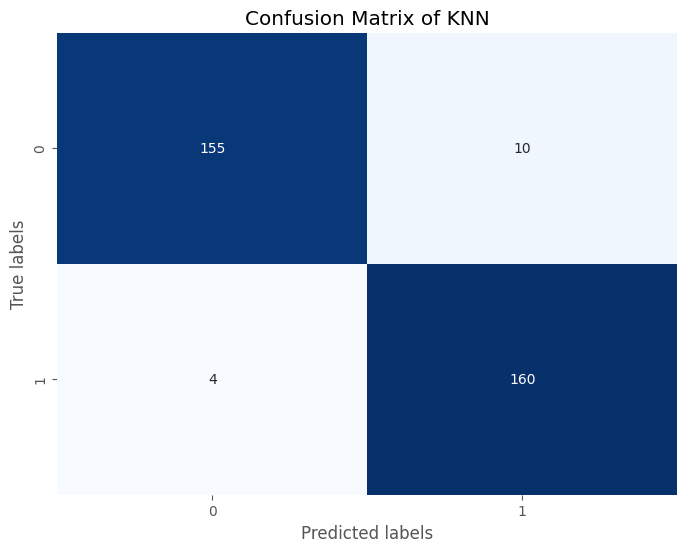

In [ ]:
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors=3)
# Obtain decision scores for test instances
knn_proba = knn.predict_proba(X_test)

# Adjust the decision threshold (increase false positive rate)
threshold = 0.3 # Adjust this threshold as needed
y_pred_threshold2 = (knn_proba[:, 1] >= threshold).astype(int)  # Assuming binary classification, adjust index if needed

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_threshold2)
print("Confusion Matrix:")
print(conf_mat)

# Calculate the validation metrics
accuracy = accuracy_score(y_test, y_pred_threshold2)
precision = precision_score(y_test, y_pred_threshold2)
recall = recall_score(y_test, y_pred_threshold2)
f1 = f1_score(y_test, y_pred_threshold2)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of KNN')
plt.show()
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
cv_score_knn = cross_val_score( KNeighborsClassifier(n_neighbors=5), X, y, cv=10)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn, 2)

print(mean_accuracy_knn)

[0.86 0.95 0.94 0.92 0.96 0.9  0.98 0.96 0.96 0.92]
93.5


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier = DecisionTreeClassifier(max_depth=1)  # Base classifier
boosting_classifier = AdaBoostClassifier(base_classifier, n_estimators=10)  # Boosting classifier

# Train the boosting classifier
boosting_classifier.fit(X_train, y_train)

# Evaluate the boosting classifier
boosting_accuracy = boosting_classifier.score(X_test, y_test)
print(boosting_accuracy)


# RF(Classification)

In [ ]:
cv_score_rf = cross_val_score( RandomForestClassifier(n_estimators=2,
    ), X, y, cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf, 2)

print(mean_accuracy_rf)

# DT(Classification)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# Assign algorithm
dt = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=10,min_samples_leaf=10,max_features=3)

# Link algorithm to X and y variables
dt.fit(X_train, y_train)


# # Check prediction error for training data using MAE
# mae_train = mean_absolute_error(y_train, dt.predict(X_train))
# print ("Training Set Mean Absolute Error: %.2f" % mae_train)

# # Check prediction error for test data using MAE
# mae_test = mean_absolute_error(y_test,dt.predict(X_test))
# print ("Test Set Mean Absolute Error: %.2f" % mae_test)
# # Predict on the training and validation sets
train_predictions = dt.predict(X_train)
val_predictions = dt.predict(X_test)

# Calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 1.0
Validation Accuracy: 0.9969604863221885
Accuracy: 0.8693009118541033
Precision: 1.0
Recall: 0.7378048780487805
F1-Score: 0.8491228070175438


In [ ]:
n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6]
min_samples_split=[5,10,20,80,85]
min_samples_leaf=[5,10,20,80,85]
max_features=[2,5]






parameters = {
    'max_depth': max_depth,
    'criterion': criterion,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)


print('Best Criterion:', grid_search.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search.best_estimator_.get_params()['max_depth'])
print('min_samples_split:', grid_search.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf:', grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('max_features:', grid_search.best_estimator_.get_params()['max_features'])

Best Criterion: gini
Best max_depth: 2
min_samples_split: 10
min_samples_leaf: 5
max_features: 5


In [ ]:


# Define a parameter grid for the Decision Tree
dt_param_grid = {
    'max_depth': [[2, 4, 6]],
    'min_samples_split': [5,10,20,80,85],
    'min_samples_leaf': [5,10,20,80,85],
    'criterion' : ['gini', 'entropy'],
    'max_features':[2,5]


}

# Create a GridSearchCV object for the Decision Tree
dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
dt.fit(X_train, y_train)

# Retrieve cross-validation results
cv_results = dt.cv_results_

# Example: View the best parameters and best score
print("Best Parameters:", dt.best_params_)
print("Best Score:", dt.best_score_)

# Example: Explore cv_results
# Names of columns in cv_results_
print("Keys in cv_results_:", cv_results.keys())

# Mean test scores for each combination of parameters
print("Mean Test Scores:", cv_results['mean_test_score'])

# Parameters for each set of results
print("Parameter Combinations:", cv_results['params'])

# Standard deviation of test scores
print("Standard Deviation of Test Scores:", cv_results['std_test_score'])

# Ranks of the parameter combinations
print("Rank of Parameter Combinations:", cv_results['rank_test_score'])


ValueError: 
All the 1000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of DecisionTreeClassifier must be an int in the range [1, inf) or None. Got [2, 4, 6] instead.


In [ ]:


# Define a parameter grid for the Decision Tree
param_grid = {

    'max_depth': [2, 4, 6],
    'min_samples_split': [5,10,20,80,85],
    'min_samples_leaf': [5,10,20,80,85],
    'criterion' : ['gini', 'entropy'],
    'max_features':[2,5]


}


# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_macro')

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve cv_results_
cv_results = grid_search.cv_results_

# Create a DataFrame with the desired columns
result_df = pd.DataFrame({
    'max_depth': [param['max_depth'] for param in cv_results['params']],
    'min_samples_split': [param['min_samples_split'] for param in cv_results['params']],
     'min_samples_leaf': [param['min_samples_leaf'] for param in cv_results['params']],
    'criterion': [param['criterion'] for param in cv_results['params']],
    'max_features': [param['max_features'] for param in cv_results['params']],

    'mean_test_score': cv_results['mean_test_score']
})

# Display the DataFrame
print(result_df)


     max_depth  min_samples_split  min_samples_leaf criterion  max_features  \
0            2                  5                 5      gini             2   
1            2                 10                 5      gini             2   
2            2                 20                 5      gini             2   
3            2                 80                 5      gini             2   
4            2                 85                 5      gini             2   
5            2                  5                10      gini             2   
6            2                 10                10      gini             2   
7            2                 20                10      gini             2   
8            2                 80                10      gini             2   
9            2                 85                10      gini             2   
10           2                  5                20      gini             2   
11           2                 10                20 

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

# Ensamble method(MAX Voting)

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9848024316109423

ROC-AUC Curve

SVM Confusion Matrix:
[[164   1]
 [ 27 137]]
SVM Accuracy: 0.9148936170212766
SVM Precision: 0.9927536231884058
SVM Recall: 0.8353658536585366
SVM F1 Score: 0.9072847682119205
SVM AUC Score: 0.9955654101995566

Logistic Regression Confusion Matrix:
[[161   4]
 [ 13 151]]
Logistic Regression Accuracy: 0.9483282674772037
Logistic Regression Precision: 0.9741935483870968
Logistic Regression Recall: 0.9207317073170732
Logistic Regression F1 Score: 0.9467084639498433
Logistic Regression AUC Score: 0.9921655580192166

KNN Confusion Matrix:
[[155  10]
 [  4 160]]
KNN Accuracy: 0.9574468085106383
KNN Precision: 0.9411764705882353
KNN Recall: 0.975609756097561
KNN F1 Score: 0.9580838323353293
KNN AUC Score: 0.985070214338507


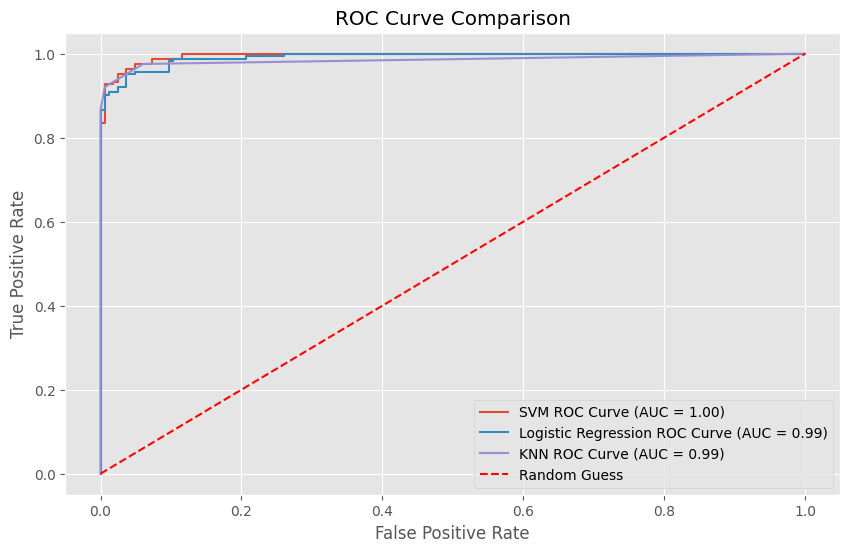

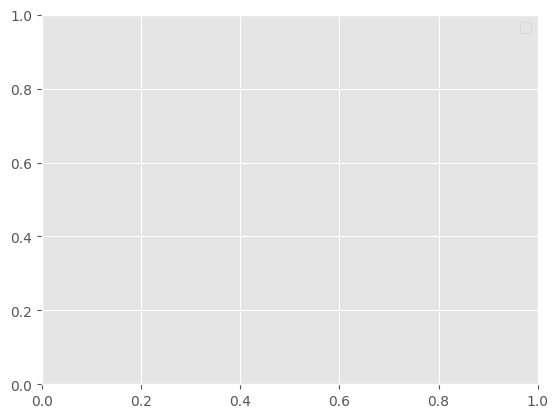

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# SVM model
svm = SVC(max_iter=1000, tol=0.1, C=.1, kernel='rbf', probability=True)
svm.fit(X_train, y_train)
decision_scores_svm = svm.decision_function(X_test)
threshold_svm = 0.03
y_pred_threshold_svm = (decision_scores_svm >= threshold_svm).astype(int)

# Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='saga', tol=0.1, C=100)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)
y_proba_positive_lr = y_proba_lr[:, 1]
threshold_lr = 0.3
y_pred_threshold_lr = (y_proba_positive_lr >= threshold_lr).astype(int)

# KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_proba = knn.predict_proba(X_test)
threshold_knn = 0.3
y_pred_threshold_knn = (knn_proba[:, 1] >= threshold_knn).astype(int)

# Compute confusion matrix and metrics for SVM
conf_mat_svm = confusion_matrix(y_test, y_pred_threshold_svm)
accuracy_svm = accuracy_score(y_test, y_pred_threshold_svm)
precision_svm = precision_score(y_test, y_pred_threshold_svm)
recall_svm = recall_score(y_test, y_pred_threshold_svm)
f1_svm = f1_score(y_test, y_pred_threshold_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, decision_scores_svm)
auc_score_svm = roc_auc_score(y_test, decision_scores_svm)

# Compute confusion matrix and metrics for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_threshold_lr)
accuracy_lr = accuracy_score(y_test, y_pred_threshold_lr)
precision_lr = precision_score(y_test, y_pred_threshold_lr)
recall_lr = recall_score(y_test, y_pred_threshold_lr)
f1_lr = f1_score(y_test, y_pred_threshold_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_positive_lr)
auc_score_lr = roc_auc_score(y_test, y_proba_positive_lr)

# Compute confusion matrix and metrics for KNN
conf_mat_knn = confusion_matrix(y_test, y_pred_threshold_knn)
accuracy_knn = accuracy_score(y_test, y_pred_threshold_knn)
precision_knn = precision_score(y_test, y_pred_threshold_knn)
recall_knn = recall_score(y_test, y_pred_threshold_knn)
f1_knn = f1_score(y_test, y_pred_threshold_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_proba[:, 1])
auc_score_knn = roc_auc_score(y_test, knn_proba[:, 1])

# Print SVM metrics
print("SVM Confusion Matrix:")
print(conf_mat_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)
print("SVM AUC Score:", auc_score_svm)

# Print Logistic Regression metrics
print("\nLogistic Regression Confusion Matrix:")
print(conf_mat_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1 Score:", f1_lr)
print("Logistic Regression AUC Score:", auc_score_lr)

# Print KNN metrics
print("\nKNN Confusion Matrix:")
print(conf_mat_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)
print("KNN AUC Score:", auc_score_knn)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label='SVM ROC Curve (AUC = {:.2f})'.format(auc_score_svm))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ROC Curve (AUC = {:.2f})'.format(auc_score_lr))
plt.plot(fpr_knn, tpr_knn, label='KNN ROC Curve (AUC = {:.2f})'.format(auc_score_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();





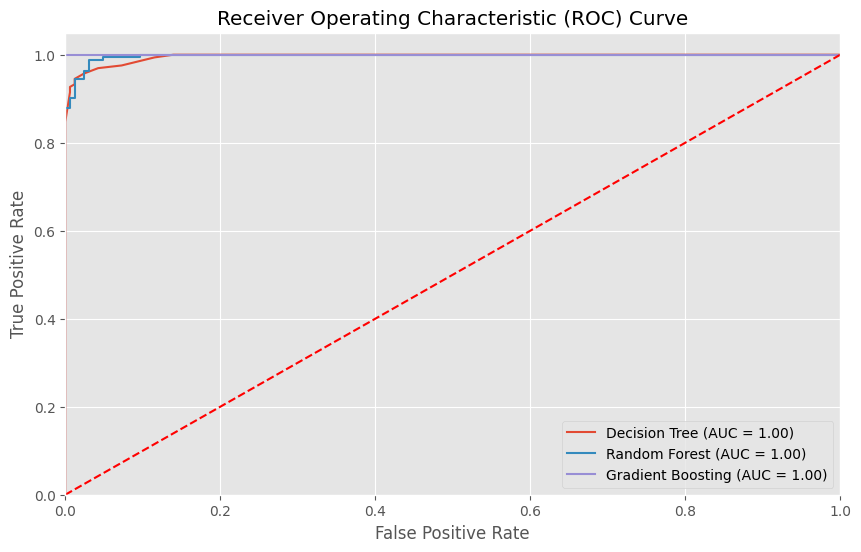

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Decision Tree
dt_auc = roc_auc_score(y_test, dt1.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt1.predict_proba(X_test)[:,1])

# Random Forest
rf_auc = roc_auc_score(y_test, rf1.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf1.predict_proba(X_test)[:,1])

# Gradient Boosting
gbc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting (AUC = %0.2f)' % gbc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


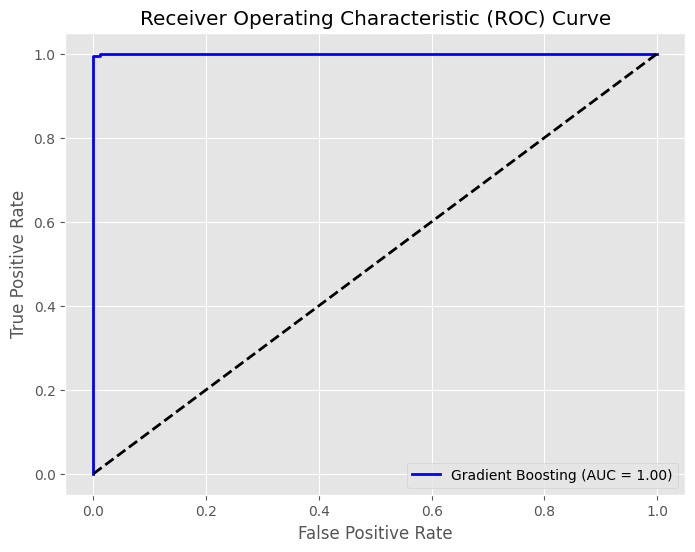

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(
    max_depth=2,
    max_features=0.2,
    min_samples_split=10,
    min_samples_leaf=15,
    learning_rate=0.001,
    n_estimators=20
)

# Train the Gradient Boosting classifier
gbc.fit(X_train, y_train)

# Make predictions
gbc_probs = gbc.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
gbc_roc_auc = roc_auc_score(y_test, gbc_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, gbc_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {gbc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


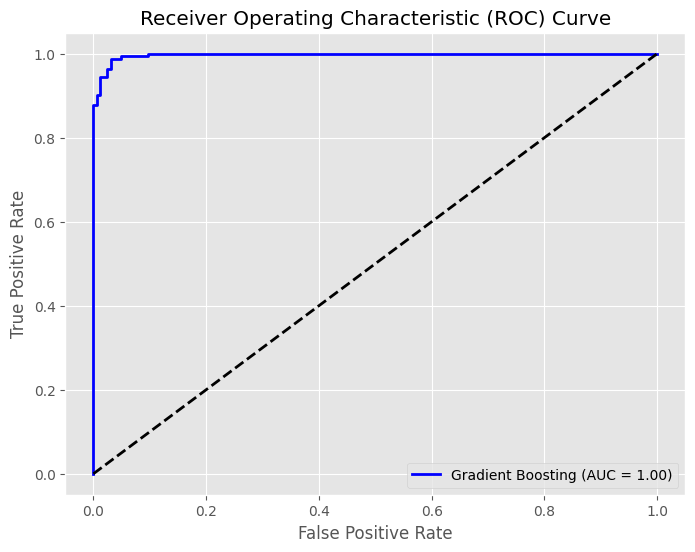

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=2, max_samples=0.50, max_features=0.2, random_state=1,
                             min_samples_split=10, min_samples_leaf=2, n_estimators=60)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Make predictions
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


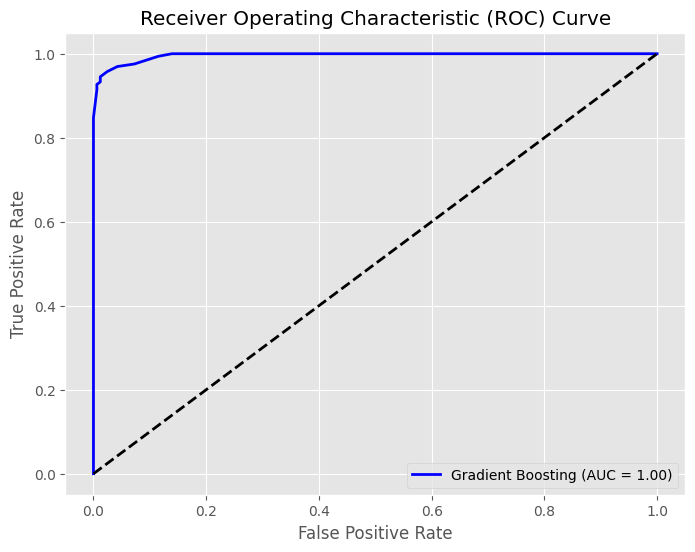

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10, criterion="gini", max_features=2, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



# Make predictions
dt_probs = dt.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, dt_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

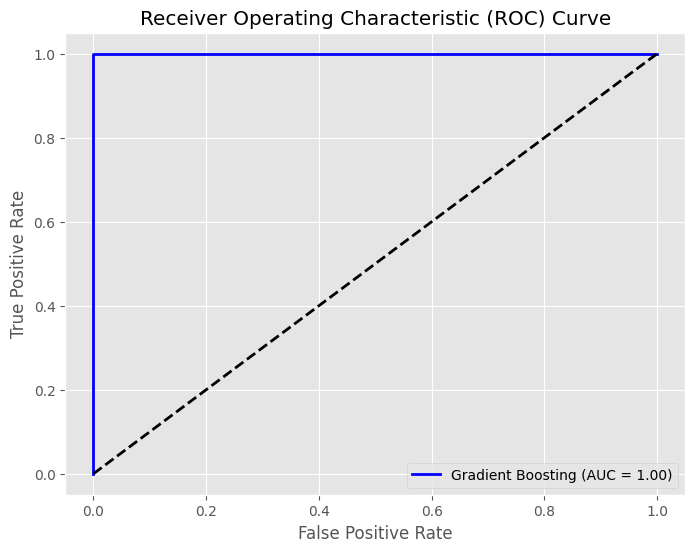

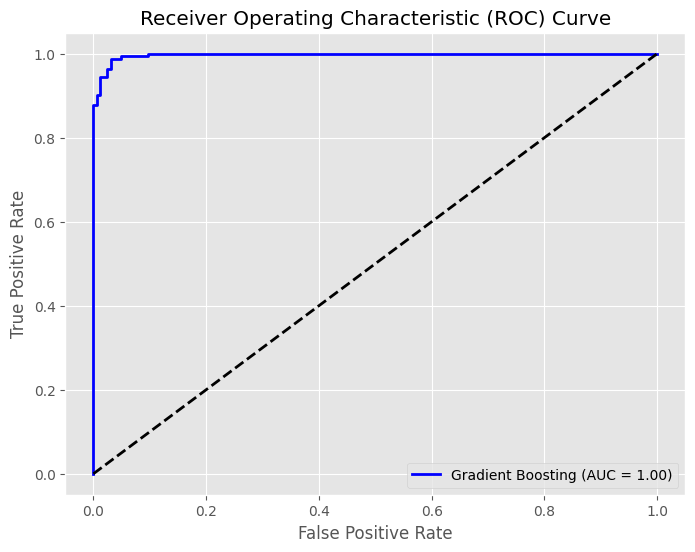

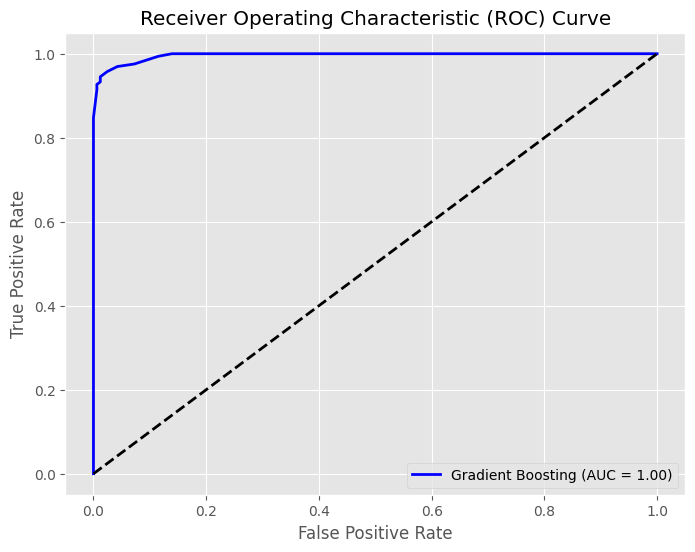

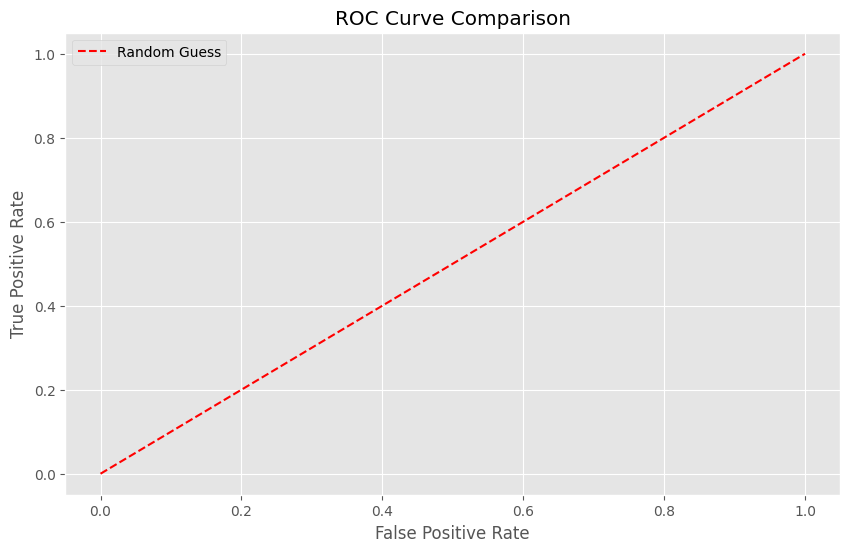

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(
    max_depth=2,
    max_features=0.2,
    min_samples_split=10,
    min_samples_leaf=15,
    learning_rate=0.001,
    n_estimators=20
)

# Train the Gradient Boosting classifier
gbc.fit(X_train, y_train)

# Make predictions
gbc_probs = gbc.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
gbc_roc_auc = roc_auc_score(y_test, gbc_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, gbc_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {gbc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=2, max_samples=0.50, max_features=0.2, random_state=1,
                             min_samples_split=10, min_samples_leaf=2, n_estimators=60)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Make predictions
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10, criterion="gini", max_features=2, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



# Make predictions
dt_probs = dt.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, dt_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Plot ROC curves
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()



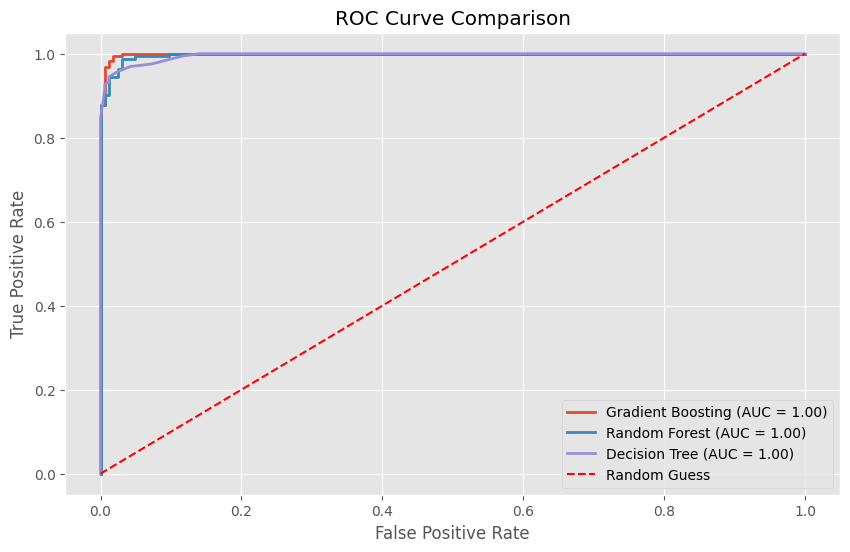

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the classifiers
classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(
         max_depth=2,
     max_features=.2,
    min_samples_split=10,
     min_samples_leaf=15,
    learning_rate=0.001,
    n_estimators=20,
         random_state=1

),

    "Random Forest": RandomForestClassifier(
        max_depth=2, max_samples=0.50, max_features=0.2, random_state=1,
                             min_samples_split=10, min_samples_leaf=2, n_estimators=60
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=10,
        criterion="gini",
        max_features=2,
        random_state=1
    )
}

plt.figure(figsize=(10, 6))

# Plot ROC curves for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()
